## Employee Attrition Prediction Model

El objetivo de la compañía es entender qué tipo de empleados son más propensos a abandonar la compañia.
Voy a desarrollar un modelo de predicción, identificar las variables que explican el abandono y proponer estrategias para disminuir la tasa de abandono.

# Importar librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score


# Observar el dataset

In [2]:
att = pd.read_csv("attrition.csv")
pd.set_option('display.max_columns', None) #Sin límite de columnas por mostrar
att.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome(KMs),Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumberCompaniesWorked,WorkedOverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimeLastYear(Weeks),WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,6,3,3,2,2,2,2


# Limpieza y entendimiento de los datos

In [3]:
#Simple descripción de los datos que nos puede indicar si hay outliers en añgunas variables numéricas
att.describe()

,Age,DistanceFromHome(KMs),Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumberCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimeLastYear(Weeks),WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
att.isnull().sum() #Ver si hay NA values
#Como no hay, no hay necesidad de eliminar entradas.

Age                            0
Attrition                      0
BusinessTravel                 0
Department                     0
DistanceFromHome(KMs)          0
Education                      0
EducationField                 0
EnvironmentSatisfaction        0
Gender                         0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumberCompaniesWorked          0
WorkedOverTime                 0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
TotalWorkingYears              0
TrainingTimeLastYear(Weeks)    0
WorkLifeBalance                0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrentManager        0
dtype: int64

In [5]:
#Entender los datos viendo los elementos de las variables categóricas.
unique_values_per_column = {col: att[col].unique() for col in att.columns if att[col].dtype == 'object'}
unique_values_per_column

{'Attrition': array(['Yes', 'No'], dtype=object),
 'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
 'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'JobRole': array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources'],
       dtype=object),
 'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
 'WorkedOverTime': array(['Yes', 'No'], dtype=object)}

# Exploración y visualización de datos

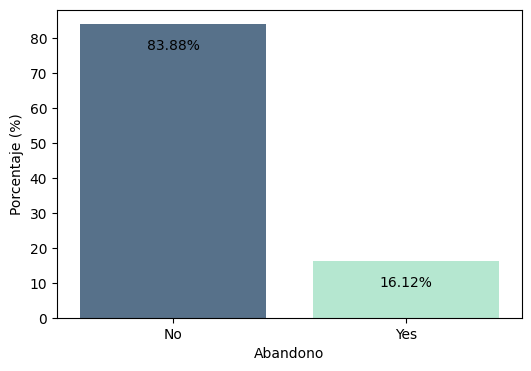

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el porcentaje de cada categoría
value_counts = att['Attrition'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=percentages.index, y=percentages.values, palette=["#4F7192", "#ADEFD1FF"])
plt.xlabel('Abandono')
plt.ylabel('Porcentaje (%)')
#plt.title('Porcentaje de abandono en la compañía')

# Ajustar la posición vertical de las etiquetas
label_offset = 4  # Ajusta este valor para controlar el desplazamiento vertical
for i, p in enumerate(ax.patches):
    ax.annotate(f'{percentages.values[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() - label_offset), ha='center', va='top')

plt.show()


## Visualización de la distribución de variables numéricas

La siguientes gráficas nos dan indicios de las razones por las que los empleados deciden renunciar. Veremos si hay diferencia en los promedios entre las personas que renuncian y las que no con base en algunas variables.

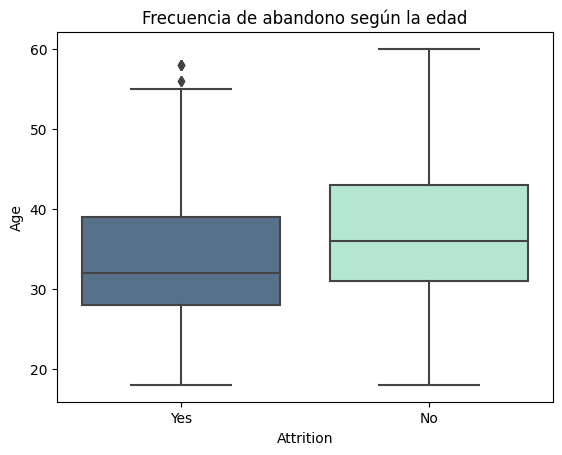

<Figure size 64000x48000 with 0 Axes>

In [7]:
custom_palette = {'Yes': '#4F7192', 'No': '#ADEFD1FF'}  # Puedes personalizar los colores para 'Yes' y 'No'

# Crea el boxplot con la paleta de colores personalizada
sns.boxplot(x='Attrition', y='Age', data=att, palette=custom_palette)
plt.title('Frecuencia de abandono según la edad')
plt.figure(dpi=10000)

# Muestra el gráfico
plt.show()
#En promedio, renuncian más las personas más jóvenes.

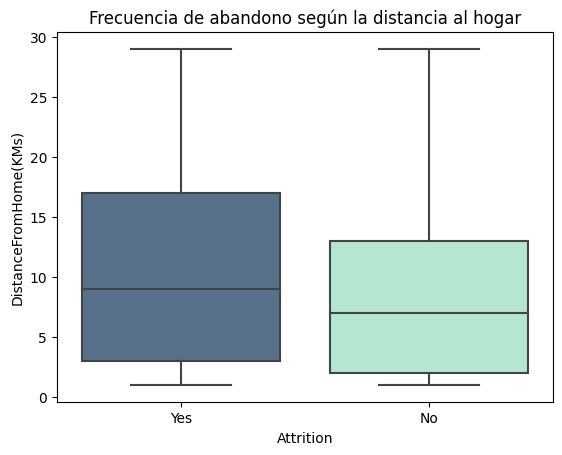

In [8]:
sns.boxplot(x='Attrition', y='DistanceFromHome(KMs)', data=att,palette=custom_palette)
plt.title('Frecuencia de abandono según la distancia al hogar')
plt.show()
#En promedio, renuncian más las personas que viven más lejos

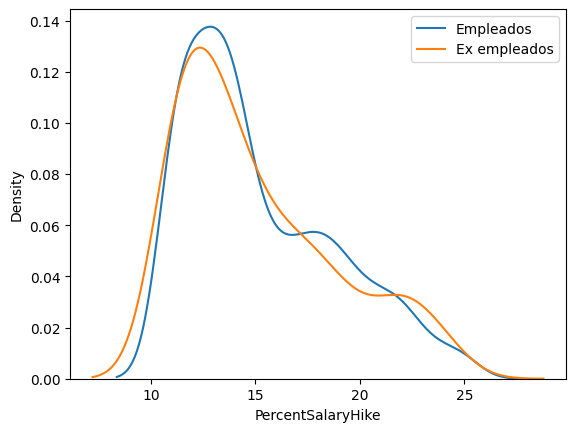

In [9]:
sns.kdeplot(att.loc[att['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Empleados')
sns.kdeplot(att.loc[att['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex empleados')


plt.legend()
plt.show()

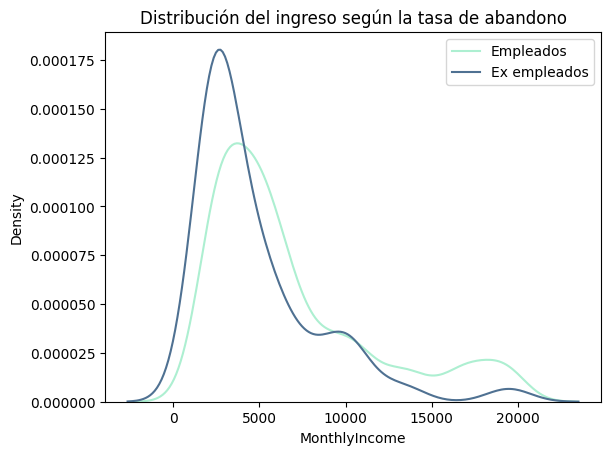

In [10]:
sns.kdeplot(att.loc[att['Attrition'] == 'No', 'MonthlyIncome'], label = 'Empleados',color='#ADEFD1FF')
sns.kdeplot(att.loc[att['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex empleados',color='#4F7192')
plt.legend()
plt.title('Distribución del ingreso según la tasa de abandono')
plt.show()
#En promedio, renuncian más las personas con salarios más bajos

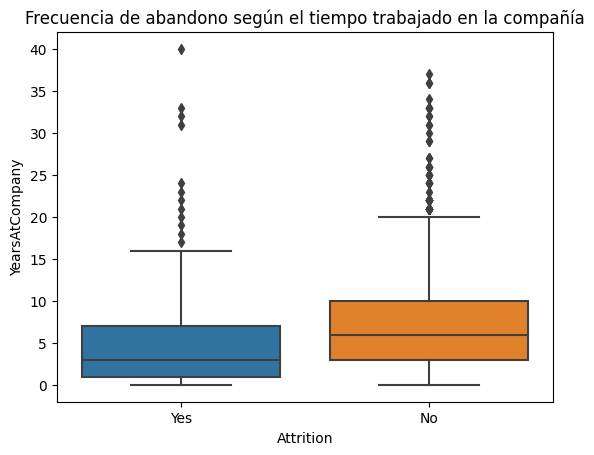

In [11]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=att)
plt.title('Frecuencia de abandono según el tiempo trabajado en la compañía')
plt.show()
#En promedio, renuncian más las personas que llevan menos en la compañia

## Visualización de la distribución de variables categóricas

Text(0.5, 0, 'Género')

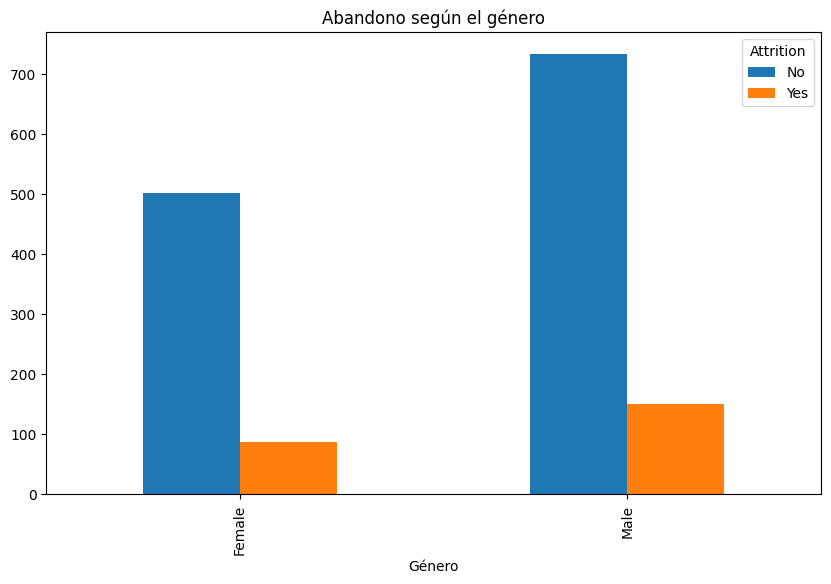

In [12]:
pd.crosstab(att['Gender'],att['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Abandono según el género")
plt.xlabel("Género")
#plt.legend(["No","Yes"])

Text(0.5, 0, 'Attrition')

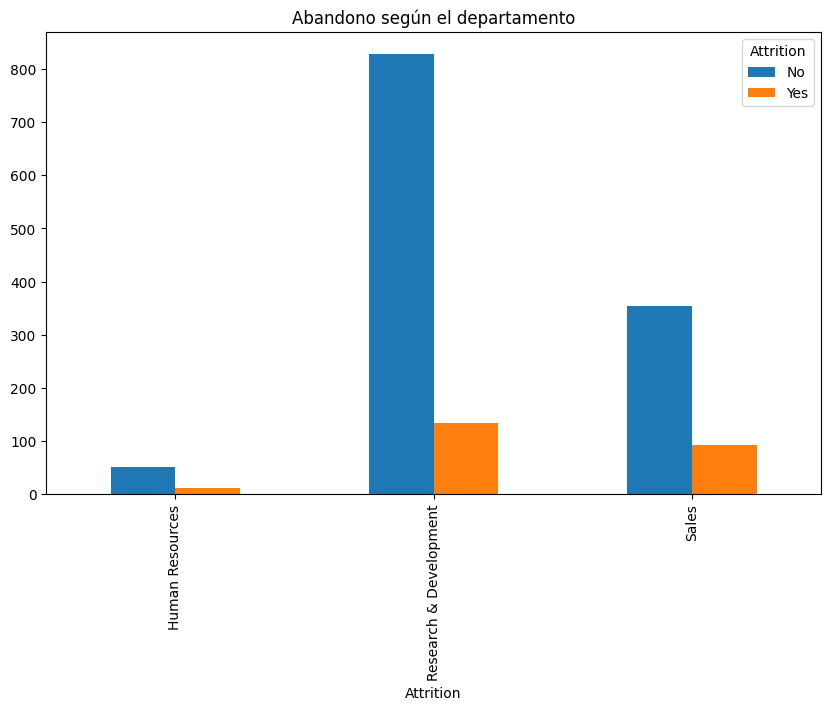

In [13]:
pd.crosstab(att['Department'],att['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Abandono según el departamento")
plt.xlabel("Attrition")
#plt.legend(["No","Yes"])
#El ratio de renuncias en ventas es mayor

Text(0.5, 0, 'Attrition')

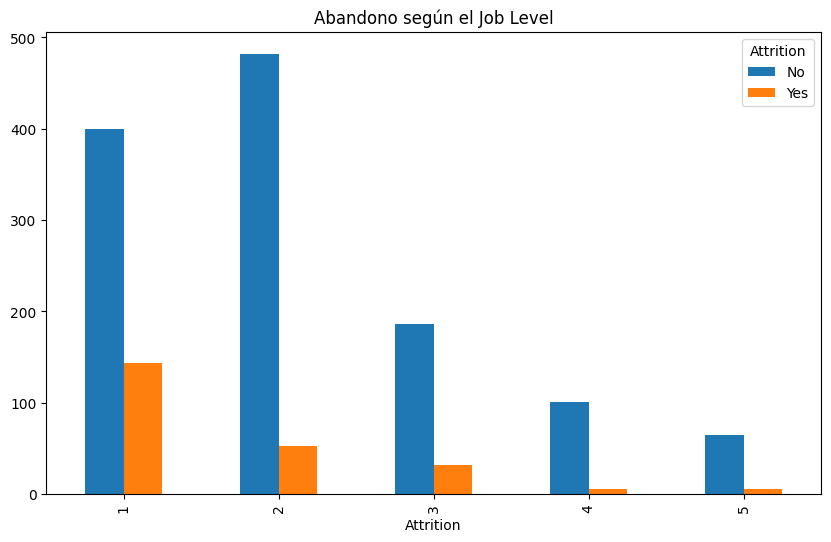

In [14]:
###########################
pd.crosstab(att['JobLevel'],att['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Abandono según el Job Level")
plt.xlabel("Attrition")
#plt.legend(["No","Yes"])
#Se van los que tienen un nivel bajo de trabajo como intern

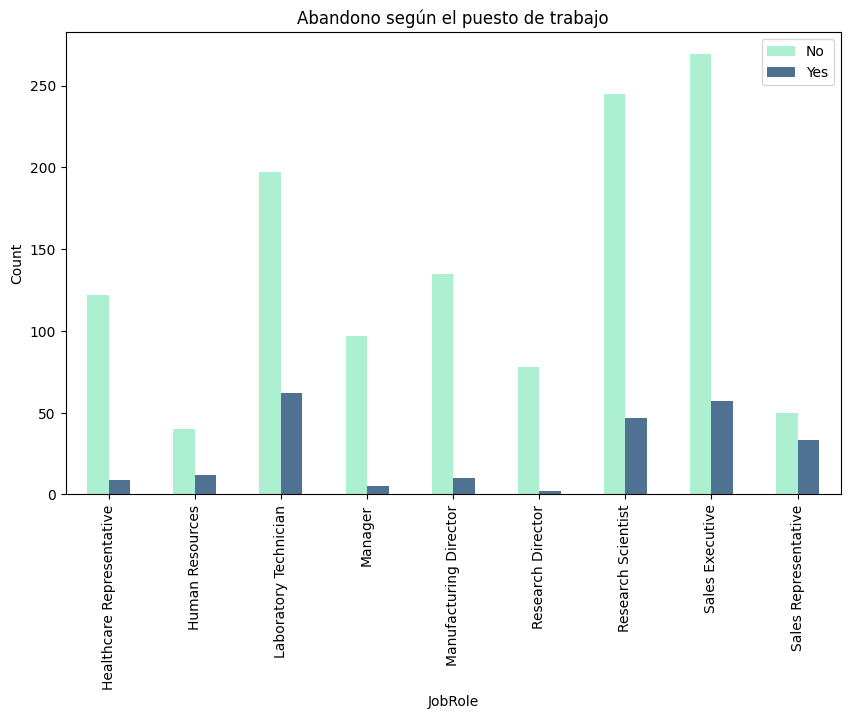

In [15]:
# Create a crosstab and then plot it
crosstab = pd.crosstab(att['JobRole'], att['Attrition'])
crosstab.plot(kind="bar", figsize=(10, 6), color=custom_palette)

plt.title("Abandono según el puesto de trabajo")
plt.xlabel("JobRole")
plt.ylabel("Count")  # You may want to label the y-axis
plt.legend(["No", "Yes"])  # You can add a legend if needed


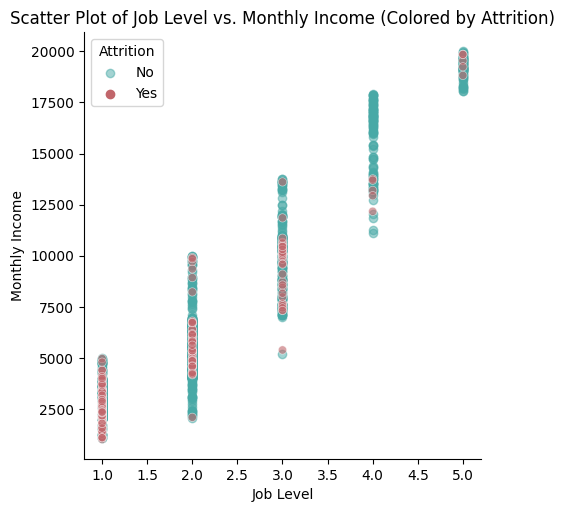

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paleta de colores
custom_palette = 'Set2'

# Filtrar en dos datsets mis clases
majority_class = att[att['Attrition'] == 'No']
minority_class = att[att['Attrition'] == 'Yes']

# Modelo de regresión para la clase mayoritaria
sns.lmplot(
    x='JobLevel',
    y='MonthlyIncome',
    data=majority_class,
        scatter_kws={'alpha': 0.5},
    hue='Attrition',
    fit_reg=False,
    legend=False,
    palette=['#48A9A6']
)

# Modelo de regresión para la clase minoritaria
sns.scatterplot(
    x='JobLevel',
    y='MonthlyIncome',
    data=minority_class,
    alpha=0.6,  # Adjust alpha for minority class
    hue='Attrition',
        palette=['#C1666B']
)

#Etiquetas
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.title('Scatter Plot of Job Level vs. Monthly Income')

# Show the plot
plt.show()
## La tasa de abandono parece recaer en los puestos de menor nivel y menos salario

<ipython-input-17-dda7be3f8524>:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(data=minority_class, x='YearsAtCompany', y='MonthlyIncome', fill=True, hue='Attrition', palette=['#48A9A6', '#C1666B'])


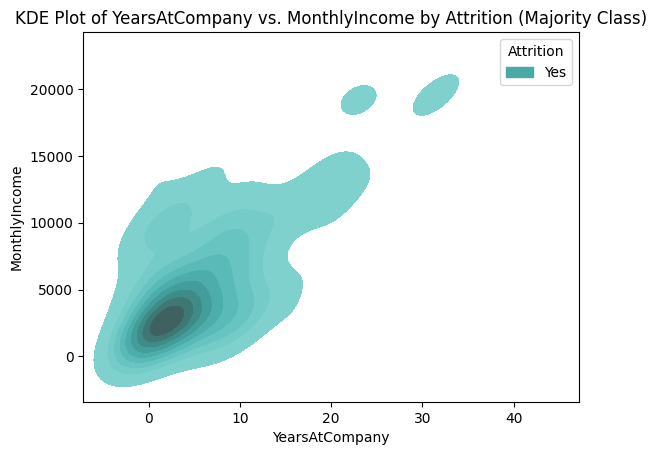

In [17]:
#Crear un Kernel Density Plot
sns.kdeplot(data=minority_class, x='YearsAtCompany', y='MonthlyIncome', fill=True, hue='Attrition', palette=['#48A9A6', '#C1666B'])
plt.title('KDE Plot of YearsAtCompany vs. MonthlyIncome ')

plt.show()
##Los empleados que abandonan la compañia se concengran en niveles bajis de experiencia y de ingreso

Las gráficas que mostré son las de mayor interés para este análisis exploratorio.

# Selección de variables
No todas las variables son relevantes para explicar el abandono a la compañía, por lo que es importante que en modelo sólo sean incluidas variables relevantes.
A través de Feature Selection y Análisis de correlación determinaré cuales son las variables de mayor relevancia para incluir en el modelo.

## Feature Selection
Seleccionar las características más importantes y eliminar las que pueden ser irrelevantes para el rendimiento del modelo.
Gracias al análisis exploratorio descubrí variables que no parecen tener alguna relación con el abandono de la compañia

In [18]:
att.drop(["EducationField","WorkedOverTime","NumberCompaniesWorked"],axis=1, inplace=True)

## Correlación
Evaluar las características que tienen una alta correlación con la variable de interés "Attrition" para identificar las variables más importantes, además de eliminar una variable que tenga alta correlación con otra para evitar probelmas de multicolinealidad.

In [19]:
#Hacer dummy la variable de attrition
att_pro = pd.get_dummies(att, columns=['Attrition'], drop_first=True)

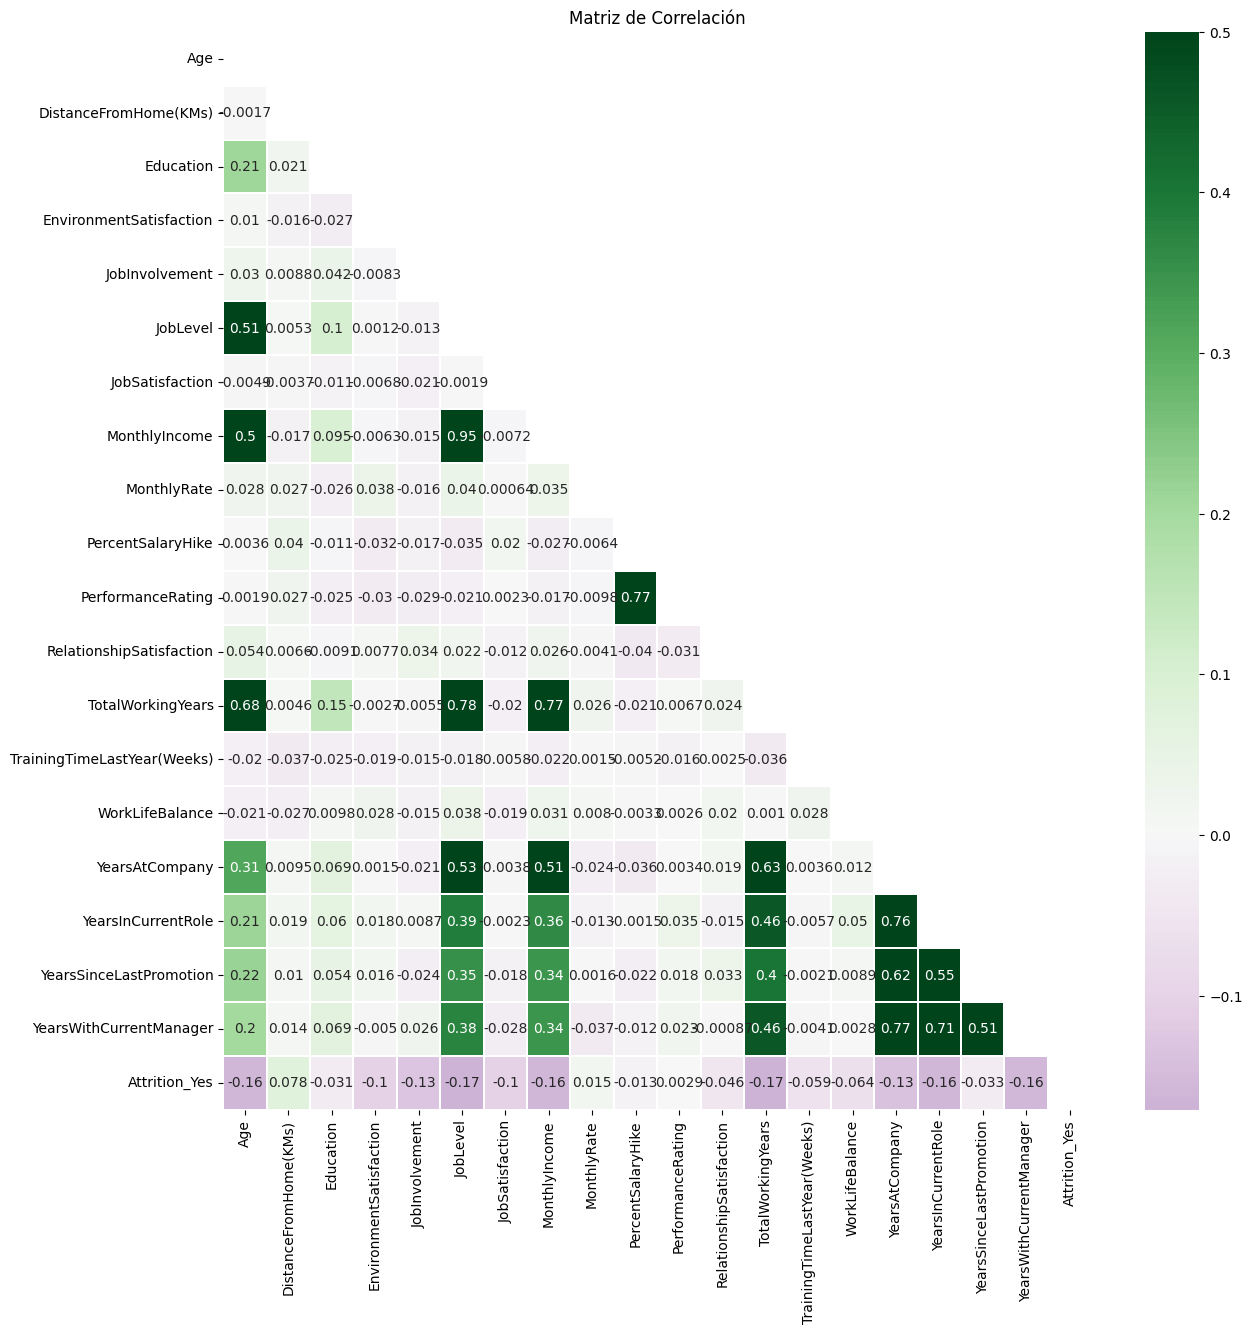

In [20]:
#Matriz de correlación
corr_matrix = att_pro.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Paleta de colores
cmap = sns.color_palette("PRGn", as_cmap=True)
#Mostrar la figura
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, vmax=0.5, mask=mask, linewidths=0.2, cmap=cmap, annot=True, center=0)
plt.title('Matriz de Correlación')
plt.show()


Hay variables altamente correlacionadas en relación con la experiencia de un individuo o con el tiempo trabajdo en la compañia, por lo que me quedaré con la variable más relevante.

# Procesamiento de datos

Antes de preparar los datos, veré qué tipos de datos tengo para evaluar cómo procesarlos.

In [21]:
# Eliminar algunas  variables que se correlacionan
att_pro.drop(["YearsWithCurrentManager","PerformanceRating","MonthlyRate"],axis=1, inplace=True)

In [22]:
att_pro.dtypes
#Ver el tipo de objeto pues necesitamos que todos sean numericos

Age                             int64
BusinessTravel                 object
Department                     object
DistanceFromHome(KMs)           int64
Education                       int64
EnvironmentSatisfaction         int64
Gender                         object
JobInvolvement                  int64
JobLevel                        int64
JobRole                        object
JobSatisfaction                 int64
MaritalStatus                  object
MonthlyIncome                   int64
PercentSalaryHike               int64
RelationshipSatisfaction        int64
TotalWorkingYears               int64
TrainingTimeLastYear(Weeks)     int64
WorkLifeBalance                 int64
YearsAtCompany                  int64
YearsInCurrentRole              int64
YearsSinceLastPromotion         int64
Attrition_Yes                   uint8
dtype: object

Tenemos variables categóricas ordinales que ya han sido procesadas con Label Encoding, es decir, se les asigna un valor numérico y el orden de estos sí importa.
A las variables categóricas nominales les aplicaré la técnica de One Hot Encoding, la cuál crea columnas binarias para cada categoría. Esta técnica es especialmente eficaz para datos nominales.

In [23]:
# Obtener dummies para mis variables categóricas
att_pro = pd.get_dummies(att_pro, columns=['Gender', 'Department', 'MaritalStatus',"JobRole","BusinessTravel"], drop_first=True)
att_pro.dtypes
#Eliminé la primer columna de cada categoría para evitar probelmas de multicolinearidad

Age                                  int64
DistanceFromHome(KMs)                int64
Education                            int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
PercentSalaryHike                    int64
RelationshipSatisfaction             int64
TotalWorkingYears                    int64
TrainingTimeLastYear(Weeks)          int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
Attrition_Yes                        uint8
Gender_Male                          uint8
Department_Research & Development    uint8
Department_Sales                     uint8
MaritalStatus_Married                uint8
MaritalStatus_Single                 uint8
JobRole_Human Resources              uint8
JobRole_Lab

Todas las variables son ahora numéricas por lo que ya puedo aplicarle los modelos

In [24]:
#Guardar el df procesado en mi directorio
att_pro.to_csv("procesados_lau.csv")

In [25]:
#Dividir el dataset en la variable objetivo y las variables explicativas
dataset = pd.read_csv("procesados_lau.csv")
dataset = pd.DataFrame(dataset)
dataset = dataset.drop(dataset.columns[0], axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['Age', 'DistanceFromHome(KMs)', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'TrainingTimeLastYear(Weeks)', 'PercentSalaryHike', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

# DataFrame original 'dataset'
original_df = dataset.copy()

# Crear un nuevo DataFrame con las columnas seleccionadas y estandarizadas
selected_columns_df = dataset[columns_to_standardize]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_columns_df)
standardized_df = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Eliminar las columnas originales que fueron estandarizadas
dataset = dataset.drop(columns=columns_to_standardize)

# Concatenar el DataFrame original con las variables estandarizadas
final_df = pd.concat([dataset, standardized_df], axis=1)
final_df

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,Attrition_Yes,Gender_Male,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Age,DistanceFromHome(KMs),MonthlyIncome,TotalWorkingYears,YearsAtCompany,TrainingTimeLastYear(Weeks),PercentSalaryHike,YearsInCurrentRole,YearsSinceLastPromotion
0,2,2,3,2,4,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0.446350,-1.010909,-0.108350,-0.421642,-0.164613,-2.171982,-1.150554,-0.063296,-0.679146
1,1,3,2,2,2,4,3,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1.322365,-0.147150,-0.291719,-0.164511,0.488508,0.155707,2.129306,0.764998,-0.368715
2,2,4,2,1,3,2,3,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0.008343,-0.887515,-0.937654,-0.550208,-1.144294,0.155707,-0.057267,-1.167687,-0.679146
3,4,4,3,1,3,3,3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,-0.429664,-0.764121,-0.763634,-0.421642,0.161947,0.155707,-1.150554,0.764998,0.252146
4,1,1,3,1,2,4,3,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,-1.086676,-0.887515,-0.644858,-0.678774,-0.817734,0.155707,-0.877232,-0.615492,-0.058285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,3,4,2,4,3,3,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.101159,1.703764,-0.835451,0.735447,-0.327893,0.155707,0.489376,-0.615492,-0.679146
1466,1,4,2,3,1,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.227347,-0.393938,0.741140,-0.293077,-0.001333,1.707500,-0.057267,0.764998,-0.368715
1467,3,2,4,2,2,2,3,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,-1.086676,-0.640727,-0.076690,-0.678774,-0.164613,-2.171982,1.309341,-0.615492,-0.679146
1468,3,4,2,2,2,4,2,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1.322365,-0.887515,-0.236474,0.735447,0.325228,0.155707,-0.330589,0.488900,-0.679146


Como se puede observar en el dataframe, todas las variables son numéricas, por lo que ya pueden ser insertadas en un modelo de aprendizaje automático



## Balanceo de datos undersampling
Como observamos en el análisis exploratorio, el 16% de los individuos son exempleados, mientras que el 84% son empleados actualmente.
De este modo, es importante balancear los datos para evitar fallas en la predicción.
Aplicare la técnica de undersampling reduciendo la cantidad de ejemplo de la clase mayoritaria (Attrition = No) para equilibrar las clases.

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print("Distribución de clases antes del undersampling:", Counter(final_df['Attrition_Yes']))

# Aplicar undersampling directamente al conjunto de datos completo
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=42)
data_resampled, _ = undersampler.fit_resample(final_df, final_df['Attrition_Yes'])

# Verificar la distribución de clases después del undersampling
print("Distribución de clases después del undersampling:", Counter(data_resampled['Attrition_Yes']))

Distribución de clases antes del undersampling: Counter({0: 1233, 1: 237})
Distribución de clases después del undersampling: Counter({0: 237, 1: 237})


In [28]:
#Dividir en variable objetivo y variables explicativas
y = data_resampled["Attrition_Yes"]
X = data_resampled.drop("Attrition_Yes",axis=1)

In [29]:
#Dividir en datos de prueba y de entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [30]:
#Importar las librerías
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


In [31]:
# Iniciar el modelo
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

Es importante considerar todas las métricas para tomar la decisión de qué modelo tiene un mejor comportamiento. En el conteto de Attrition prediction, la métrica más importante es la de precision y la de recall ya que tratamos de ser precisos con la predicción sobre las personas que son propensar a abandonar la compañia.
El F1 Score es una métrica que combina ambas métricas por lo que le daré prioridad al valor de esta métrica en cada modelo, siempre balanceándolo con las demás métricas.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Modelos que utilizaré
model_names = ["Logistic Regression", "Decision Tree", "KNN", "SVM", "Random Forest"]
models = [lr, dt, knn, svm, rm]

# Definir listas para almacenar los resultados
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []





In [33]:
for model, model_name in zip(models, model_names):
    # Entrenar el modelo en los datos de entrenamiento
    model.fit(X_train, y_train)

    # Realizar predicciones en los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Almacenar las métricas en las listas
    accuracy_scores.append((model_name, accuracy))
    precision_scores.append((model_name, precision))
    recall_scores.append((model_name, recall))
    f1_scores.append((model_name, f1))

In [34]:
# Crear un DataFrame con las métricas
metrics_dict = {
    "Model": model_names,
    "Accuracy": [score for _, score in accuracy_scores],
    "Precision": [score for _, score in precision_scores],
    "Recall": [score for _, score in recall_scores],
    "F1 Score": [score for _, score in f1_scores]
}
metrics_df = pd.DataFrame(metrics_dict)

# Redondear todas las columnas numéricas a tres decimales
metrics_df = metrics_df.round(3)

# Exportar el DataFrame en formato LaTeX con márgenes y ajustar el ancho
latex_table = metrics_df.to_latex(index=False, escape=False, column_format='|l|c|c|c|c|')

# Agregar el entorno de tabla con márgenes
latex_table = "\\begin{table}[htbp]\n" + latex_table + "\\end{table}"

# Imprimir la tabla LaTeX o guardarla en un archivo según sea necesario
print(latex_table)



\begin{table}[htbp]
\begin{tabular}{|l|c|c|c|c|}
\toprule
              Model &  Accuracy &  Precision &  Recall &  F1 Score \\
\midrule
Logistic Regression &     0.716 &      0.762 &   0.653 &     0.703 \\
      Decision Tree &     0.632 &      0.630 &   0.694 &     0.660 \\
                KNN &     0.663 &      0.707 &   0.592 &     0.644 \\
                SVM &     0.726 &      0.756 &   0.694 &     0.723 \\
      Random Forest &     0.705 &      0.744 &   0.653 &     0.696 \\
\bottomrule
\end{tabular}
\end{table}


<ipython-input-34-fa5d12742da3>:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = metrics_df.to_latex(index=False, escape=False, column_format='|l|c|c|c|c|')


## Balanceo de datos Oversampling

Se repite el proceso para los datos balanceados por oversampling

In [35]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Verificar la distribución de clases antes del oversampling
print("Distribución de clases antes del oversampling:", Counter(final_df['Attrition_Yes']))

# Aplicar oversampling directamente al conjunto de datos completo
oversampler = RandomOverSampler(sampling_strategy=1, random_state=42)
data_resampled, _ = oversampler.fit_resample(final_df, final_df['Attrition_Yes'])

# Verificar la distribución de clases después del oversampling
print("Distribución de clases después del oversampling:", Counter(data_resampled['Attrition_Yes']))


Distribución de clases antes del oversampling: Counter({0: 1233, 1: 237})
Distribución de clases después del oversampling: Counter({1: 1233, 0: 1233})


In [36]:
#Dividir en variable objetivo y variables explicativas
y = data_resampled["Attrition_Yes"]
X = data_resampled.drop("Attrition_Yes",axis=1)

In [37]:
#Dividir en datos de prueba y de entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
# Iniciar el modelo
from sklearn import svm

lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ["Logistic Regression", "Decision Tree", "KNN", "SVM", "Random Forest"]
models = [lr, dt, knn, svm, rm]

# Definir listas para almacenar los resultados
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []




In [40]:
for model, model_name in zip(models, model_names):
    # Entrenar el modelo en los datos de entrenamiento
    model.fit(X_train, y_train)

    # Realizar predicciones en los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Almacenar las métricas en las listas
    accuracy_scores.append((model_name, accuracy))
    precision_scores.append((model_name, precision))
    recall_scores.append((model_name, recall))
    f1_scores.append((model_name, f1))

In [41]:
metrics_dict = {
    "Model": model_names,
    "Accuracy": [score for _, score in accuracy_scores],
    "Precision": [score for _, score in precision_scores],
    "Recall": [score for _, score in recall_scores],
    "F1 Score": [score for _, score in f1_scores]
}
metrics_df = pd.DataFrame(metrics_dict)

# Redondear todas las columnas numéricas a tres decimales
metrics_df = metrics_df.round(3)

# Exportar el DataFrame en formato LaTeX con márgenes y ajustar el ancho
latex_table = metrics_df.to_latex(index=False, escape=False, column_format='|l|c|c|c|c|')

# Agregar el entorno de tabla con márgenes
latex_table = "\\begin{table}[htbp]\n" + latex_table + "\\end{table}"

# Imprimir la tabla LaTeX o guardarla en un archivo según sea necesario
print(latex_table)

\begin{table}[htbp]
\begin{tabular}{|l|c|c|c|c|}
\toprule
              Model &  Accuracy &  Precision &  Recall &  F1 Score \\
\midrule
Logistic Regression &     0.717 &      0.731 &   0.720 &     0.725 \\
      Decision Tree &     0.917 &      0.875 &   0.981 &     0.925 \\
                KNN &     0.864 &      0.817 &   0.953 &     0.880 \\
                SVM &     0.713 &      0.725 &   0.720 &     0.723 \\
      Random Forest &     0.974 &      0.969 &   0.981 &     0.975 \\
\bottomrule
\end{tabular}
\end{table}


<ipython-input-41-3f0a17d539a3>:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = metrics_df.to_latex(index=False, escape=False, column_format='|l|c|c|c|c|')


## Datos no balanceados

Se repite el proceso para los datos balanceados

In [42]:
#Dividir en variable objetivo y variables explicativas
y = final_df["Attrition_Yes"]
X = final_df.drop("Attrition_Yes",axis=1)
#Dividir en datos de prueba y de entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [43]:
# Iniciar el modelo
from sklearn import svm
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [44]:
for a,b in zip([lr,dt,knn,svm,rm],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest"]):
    a.fit(X_train,y_train)
    y_pred=a.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ["Logistic Regression", "Decision Tree", "KNN", "SVM", "Random Forest"]
models = [lr, dt, knn, svm, rm]

# Definir listas para almacenar los resultados
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []



In [46]:

# Crear un bucle para calcular las métricas para cada modelo
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Almacenar las métricas en las listas
    accuracy_scores.append((model_name, accuracy))
    precision_scores.append((model_name, precision))
    recall_scores.append((model_name, recall))
    f1_scores.append((model_name, f1))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:

metrics_dict = {
    "Model": model_names,
    "Accuracy": [score for _, score in accuracy_scores],
    "Precision": [score for _, score in precision_scores],
    "Recall": [score for _, score in recall_scores],
    "F1 Score": [score for _, score in f1_scores]
}
metrics_df = pd.DataFrame(metrics_dict)

# Crear un DataFrame a partir del diccionario
# Redondear todas las columnas numéricas a tres decimales
metrics_df = metrics_df.round(3)

# Exportar el DataFrame en formato LaTeX con márgenes y ajustar el ancho
latex_table = metrics_df.to_latex(index=False, escape=False, column_format='|l|c|c|c|c|')

# Agregar el entorno de tabla con márgenes
latex_table = "\\begin{table}[htbp]\n" + latex_table + "\\end{table}"

# Imprimir la tabla LaTeX o guardarla en un archivo según sea necesario
print(latex_table)

\begin{table}[htbp]
\begin{tabular}{|l|c|c|c|c|}
\toprule
              Model &  Accuracy &  Precision &  Recall &  F1 Score \\
\midrule
Logistic Regression &     0.816 &       0.75 &   0.103 &     0.182 \\
      Decision Tree &     0.721 &       0.20 &   0.138 &     0.163 \\
                KNN &     0.803 &       0.50 &   0.155 &     0.237 \\
                SVM &     0.803 &       0.00 &   0.000 &     0.000 \\
      Random Forest &     0.810 &       0.60 &   0.103 &     0.176 \\
\bottomrule
\end{tabular}
\end{table}


<ipython-input-47-8a0b1ab05c45>:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = metrics_df.to_latex(index=False, escape=False, column_format='|l|c|c|c|c|')


De acuerdo con los resultados, se observa que el modelo de Random Forest es el que tiene la mejor puntuación en la mayoría de las métricas. Por ello, utilizaremos este modelo.

In [48]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Aplicar oversampling directamente al conjunto de datos completo
oversampler = RandomOverSampler(sampling_strategy=1, random_state=42)
data_resampled, _ = oversampler.fit_resample(final_df, final_df['Attrition_Yes'])
#
y = data_resampled["Attrition_Yes"]
X = data_resampled.drop("Attrition_Yes",axis=1)
#Dividir en datos de prueba y de entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [49]:
# Crear una instancia de RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Entrenar el modelo en los datos de entrenamiento
rf_classifier.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.97165991902834
Precision: 0.9655172413793104
Recall: 0.980544747081712
F1 Score: 0.972972972972973


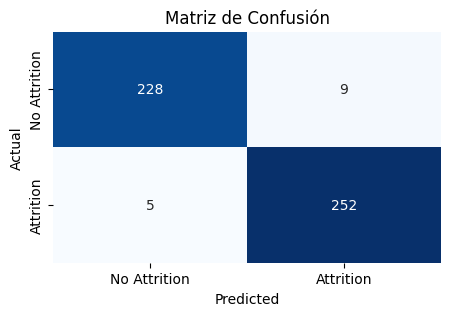

In [50]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

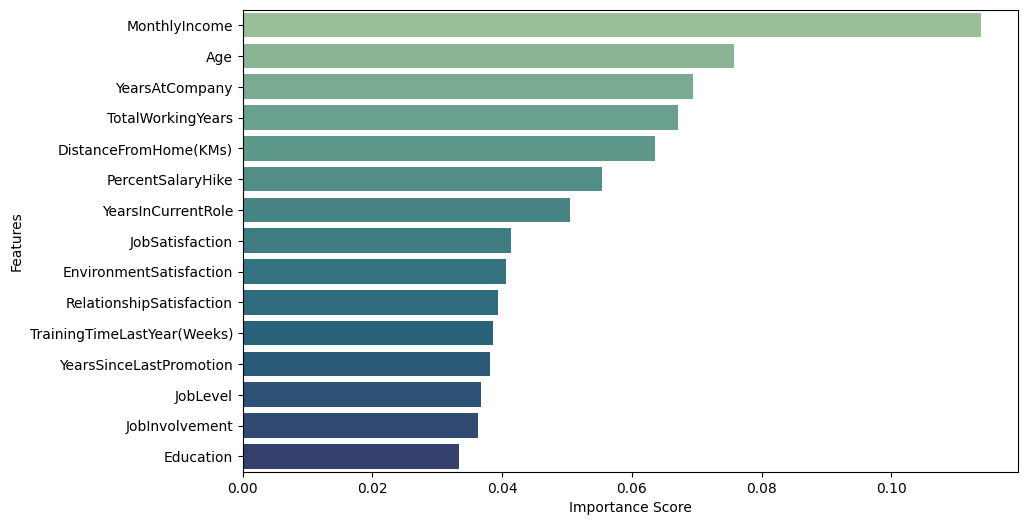

In [51]:
# Obtener las características más importantes que explican la tasa de abandono
feature_importance_scores = rf_classifier.feature_importances_

# Crear el dataframe con característica y su nivel de importancia
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_scores})

# Ordenar de mayor a menos
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar ese dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:15],palette='crest')  # Display the top 20 features
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



